In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [93]:
df = pd.read_csv('data_elonmusk.csv',encoding = "ISO-8859-1")

In [2]:
df = pd.read_csv('Combined_News_DJIA.csv')

In [3]:
df.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading after tanking more than 8%,Pope says Church should ask forgiveness from gays for past treatment,Poland 'shocked' by xenophobic abuse of Poles in UK,"There will be no second referendum, cabinet agrees","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid Brexit uncertainty,No negative news about South African President allowed on state broadcaster.,Surge in Hate Crimes in the U.K. Following U.K.s Brexit Vote,...,German lawyers to probe Erdogan over alleged war crimes,"Boris Johnson says the UK will continue to ""intensify"" cooperation with the EU and tells his fellow Leave supporters they must accept the 52-48 referendum win was ""not entirely overwhelming"".",Richard Branson is calling on the UK government to hold a second EU referendum to prevent 'irreversible damage' to the country.,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon from Obama,"Brexit opinion poll reveals majority don't want second EU referendum: ""half (48%) of British adults say that they are happy with the result, with two in five (43%) saying they are unhappy with the...","Conservative MP Leave Campaigner: ""The leave campaign don't have a post-Brexit plan...""","Economists predict UK recession, further weakening of Pound following Brexit.","New EU 'superstate plan by France, Germany: Creating a European superstate limiting the powers of individual members following Britains referendum decision to leave the EU",Pakistani clerics declare transgender marriages legal under Islamic law
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To Save The Great Barrier Reef, Stop Supporting Coal","The personal details of 112,000 French police officers have been uploaded to Google Drive in a security breach just a fortnight after two officers were murdered at their home by a jihadist.",S&amp;P cuts United Kingdom sovereign credit rating to 'AA' from 'AAA',Huge helium deposit found in Africa,CEO of the South African state broadcaster quits shortly after negative news about president is banned.,"Brexit cost investors $2 trillion, the worst one day drop ever",Hong Kong democracy activists call for return to British rule as first step to independence,Brexit: Iceland president says UK can join 'triangle' of non-EU countries,...,"US, Canada and Mexico pledge 50% of power from clean energy by 2025","There is increasing evidence that Australia is torturing refugees, medical experts claim","Richard Branson, the founder of Virgin Group, said Tuesday that the company has lost about a third of its value since the U.K. voted to leave the European Union last week.","37,000-yr-old skull from Borneo reveals surprise for scientists - Study of the ""Deep Skull"" - oldest modern human discovered in SE Asia - reveals this ancient person was not related to Indigenous ...",Palestinians stone Western Wall worshipers; police shut Temple Mount to non-Muslims,Jean-Claude Juncker asks Farage: Why are you here?,"""Romanians for Remainians"" offering a new home to the 48% of Britons who voted to stay in the EU | Bucharest newspaper's app connects loving Romanian families with needy Brits, allowing people to ...",Brexit: Gibraltar in talks with Scotland to stay in EU,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual torture' against women: Rights group Amnesty International has compiled testimonies of sexual violence used as torture by Mexican security forces. De...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offspring of Wahhabism of Al Saud regime,UK must accept freedom of movement to access EU Market,Devastated: scientists too late to captive breed mammal lost to climate change - Australian conservationists spent 5 months obtaining permissions &amp; pl

In [4]:
df.shape

(1989, 27)

In [5]:
#fix nans
documents = []
for row in range(df.shape[0]):
    for col in range(2,27):
        if type(df.iloc[row,col])!=str:
            print(df.iloc[row,col])
            documents.append(" ")
        else:
            documents.append(df.iloc[row,col])
len(documents)

nan
nan
nan
nan
nan
nan
nan


49725

In [6]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")


# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['headline_text'] = news_df['clean_doc'].apply(lambda x: x.lower())
news_df["index"] = [i for i in range(len(documents))]
del news_df['document']
del news_df['clean_doc']
documents = news_df

In [7]:
documents[0:5]

,headline_text,index
0,georgia downs russian warplanes countries move brink,0
1,breaking musharraf impeached,1
2,russia today columns troops roll into south ossetia footage from fighting youtube,2
3,russian tanks moving towards capital south ossetia which reportedly been completely destroyed georgian artillery fire,3
4,afghan children raped with impunity official says this sick three year raped they nothing,4


In [98]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer
#from nltk.stem.porter import stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\caboonie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [100]:
doc_sample = documents[documents['index'] == 3000].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['heart', 'goes', 'people', 'central', 'texas', 'home', 'spacex', 'resources', 'disposal', 'help']


 tokenized and lemmatized document: 
['heart', 'go', 'peopl', 'central', 'texa', 'home', 'spacex', 'resourc', 'dispos', 'help']


In [101]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0                    [meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]
1          [spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]
2                                                                                                   [bigajm]
3                                                                                               [http, muhm]
4                                                          [place, earth, min, cost, seat, http, dgyddgttyd]
5    [spacex, support, creation, perman, self, sustain, human, presenc, mar, http, kctblpbsg, http, hksrocg]
6                                                                                         [earth, min, http]
7                                       [mar, citi, opposit, earth, dawn, dusk, blue, mar, http, xhczidgqnb]
8                                                                                  [moon, base, alpha, http]
9                  

In [102]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 acceler
1 assum
2 comfort
3 direct
4 feel
5 fpjmegrhfc
6 http
7 like
8 meltingic
9 mild
10 moder


In [103]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [104]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(11, 1), (53, 1), (111, 1), (226, 1), (250, 1)]

In [105]:
bow_doc_4310 = bow_corpus[3000]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 11 ("spacex") appears 1 time.
Word 53 ("peopl") appears 1 time.
Word 111 ("go") appears 1 time.
Word 226 ("help") appears 1 time.
Word 250 ("home") appears 1 time.


In [106]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6547866057704743),
 (1, 0.6402459154717929),
 (2, 0.11654199638516236),
 (3, 0.3843925489702265)]


In [107]:
#LSA?
lda_model = gensim.models.LsiModel(bow_corpus, num_topics=10, id2word=dictionary)

In [108]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [109]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.165*"http" + 0.033*"tesla" + 0.030*"like" + 0.022*"spacex" + 0.018*"dragon" + 0.017*"articl" + 0.017*"look" + 0.017*"space" + 0.016*"model" + 0.016*"station"
Topic: 1 
Words: 0.231*"http" + 0.059*"spacex" + 0.035*"launch" + 0.024*"rocket" + 0.021*"falcon" + 0.021*"land" + 0.017*"right" + 0.016*"tesla" + 0.015*"space" + 0.013*"watch"
Topic: 2 
Words: 0.063*"http" + 0.036*"work" + 0.030*"yeah" + 0.028*"hyperloop" + 0.025*"tesla" + 0.024*"teslamotor" + 0.022*"exactli" + 0.020*"falcon" + 0.018*"bore" + 0.017*"thank"
Topic: 3 
Words: 0.061*"time" + 0.060*"http" + 0.025*"mayb" + 0.023*"great" + 0.021*"like" + 0.020*"tunnel" + 0.020*"go" + 0.018*"land" + 0.018*"cours" + 0.017*"long"
Topic: 4 
Words: 0.092*"http" + 0.050*"tesla" + 0.040*"spacex" + 0.035*"love" + 0.022*"falcon" + 0.020*"high" + 0.017*"test" + 0.016*"sure" + 0.016*"autopilot" + 0.015*"month"
Topic: 5 
Words: 0.143*"http" + 0.054*"good" + 0.048*"launch" + 0.021*"chang" + 0.018*"falcon" + 0.018*"mar" + 0.017*"te

In [110]:
#number of documents
lda_model[bow_corpus[354]]
processed_docs.shape

(3218,)

In [116]:
#Now let's average out those scores over the surrounding 1000 articles scores to see how average scores change over time
n = processed_docs.shape[0]
averages = []
i=0
start = 2012
end = 2017
dates = []
while(i<n):
    array = np.zeros((10,1))
    k=0
    pred = lda_model[bow_corpus[i]]
    for j in range(10):
        if j in [tup[0] for tup in pred]:
            array[j,:] = pred[k][1]
            k+=1
            
    running_sum = array
    i+=1
    count = 0
    while (i)%200 != 0 and i<n:
        #print(i)
        array = np.zeros((10,1))
        k=0
        pred = lda_model[bow_corpus[i]]
        for j in range(10):
            if j in [tup[0] for tup in pred]:
                try:
                    array[j,:] = pred[k][1]
                    k+=1
                except:
                    print(i,array,j,k,pred)

        running_sum = running_sum + array
        i+=1
        count+=1
    averages.append(running_sum/count)
    dates.append(start + (end-start)*i/n)

In [117]:
averages = np.hstack(average for average in averages)
averages.shape

(10, 17)

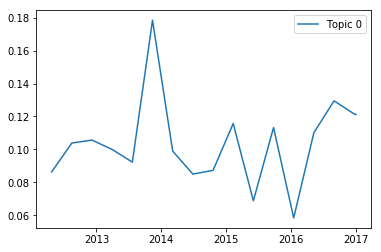

In [118]:
import matplotlib.pyplot as plt
plt.plot(dates,averages[9:10,:].T)
plt.legend(["Topic "+str(i) for i in range(averages.shape[0])])

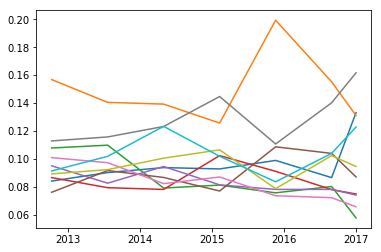

In [114]:
import matplotlib.pyplot as plt
plt.plot(dates,averages.T)